# Проект: Обучение с учителем: качество модели

**План проекта**

***1. Введение***

***2. Загрузка и подготовка данных***

Шаг 1: Загрузка данных

- Загрузить данные из файлов: market_file.csv, market_money.csv, market_time.csv, money.csv.
- Убедиться в корректности формата файлов (разделитель и формат данных).

Шаг 2: Предобработка данных

- Обработать названия столбцов (оставить кириллическими).
- Проверить пропуски и аномалии в данных (обработка пропусков, дубликатов и выбор корректных типов данных).

***3. Исследовательский анализ данных***

Шаг 3: Проведение EDA

- Изучить распределение признаков, используя графики и описательную статистику.
- Определить клиентов с активностью не менее трех месяцев.
- Оформить выводы о вычисленных статистиках и взаимосвязях между признаками.

***4. Объединение таблиц***

Шаг 4: Объединение данных

- Объединить таблицы market_file.csv, market_money.csv, market_time.csv.
- Создать отдельные столбцы для каждого периода выручки и времени, проведенного на сайте.

***5. Корреляционный анализ***

Шаг 5: Корреляционный анализ

- Рассмотреть корреляцию количественных признаков в объединённой таблице.
- Проверить наличие мультиколлинеарности и при необходимости удалить высоко коррелируемые признаки.

***6. Моделирование***

Шаг 6: Модели и пайплайны

- Разработать пайплайн для обработки данных с использованием ColumnTransformer для кодирования и масштабирования признаков.
- Обучить четыре модели:
        KNeighborsClassifier()
        DecisionTreeClassifier()
        LogisticRegression()
        SVC()
- Подобрать гиперпараметры для каждой модели и выбрать метрику (например, F1-score или ROC-AUC).
- Выбрать лучшую модель на основе метрики.

***7. Анализ важности признаков***

Шаг 7: Оценка важности признаков

- Использовать метод SHAP для анализа важности признаков в лучшей модели.
- Сделать выводы о наиболее значимых признаках и их влиянии на целевой признак.

***8. Сегментация покупателей***

Шаг 8: Сегментация

- Использовать результаты моделирования и данные о прибыльности для выделения сегментов покупателей.
- Провести графический и аналитический анализ выбранной группы покупателей.
- Предложить меры по увеличению покупательской активности для выбранного сегмента.

***9. Общий вывод***

Шаг 9: Заключение

- Описать задачу, исходные данные, проведённую предобработку.
- Подвести итоги построения моделей и указать наилучшую модель.
- Указать, какие изменения были предложены для повышения активности выбранного сегмента покупателей.

## Введение

Цели проекта:  
- Разработать модель, которая предскажет снижение покупательской активности клиентов за следующие три месяца.
- Выделить сегменты покупателей, проанализировать их и предложить персонализированные предложения для повышения активности.  
Задачи:  
- Исследовать и подготовить данные для обучения модели.
- Построить несколько моделей и выбрать наилучший вариант.
- Проанализировать важность признаков для принятия обоснованных бизнес-решений.
- Сегментировать покупателей и предложить стратегии увеличения их активности.


## Загрузка и подготовка данных

**Импорт библиотек**

In [1]:
pip install shap

     |████████████████████████████████| 939 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


***Импортируем библиотеки***

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import shap
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc

### Загрузка данных

***Загружаем датасеты***

In [4]:
# Определяем пути к файлам
market_file_path = '/datasets/market_file.csv'
market_money_path = '/datasets/market_money.csv'
market_time_path = '/datasets/market_time.csv'
money_path = '/datasets/money.csv'

# Загружаем данные
market_file = pd.read_csv(market_file_path, decimal=',')
market_money = pd.read_csv(market_money_path, decimal=',')
market_time = pd.read_csv(market_time_path, decimal=',')
money = pd.read_csv(money_path, decimal=',', sep=';')

# Проверка загруженных данных
print("Market File Data:")
display(market_file.head())

print("Market Money Data:")
display(market_money.head())

print("Market Time Data:")
display(market_time.head())

print("Money Data:")
display(money.head()) 

Market File Data:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Market Money Data:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Market Time Data:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Money Data:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


***Проверяем данные методом `info()`***

In [5]:
# Проверка структуры и типов данных для каждого набора данных
for df in [market_file, market_money, market_time, money]:
    print(df.info())
    display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300,1300,1300,1300,1300.000000,1300.000000,1300,1300,1300.00000,1300.000000,1300.000000,1300.000000
unique,NaN,2,3,2,41,NaN,NaN,42,6,NaN,NaN,NaN,NaN
top,NaN,Прежний уровень,стандарт,да,4.1,NaN,NaN,0.24,Товары для детей,NaN,NaN,NaN,NaN
freq,NaN,802,914,962,94,NaN,NaN,93,330,NaN,NaN,NaN,NaN
mean,215997.500000,NaN,NaN,NaN,NaN,4.011538,601.898462,NaN,NaN,3.27000,2.840000,4.185385,8.176923
std,375.421985,NaN,NaN,NaN,NaN,0.696868,249.856289,NaN,NaN,1.35535,1.971451,1.955298,3.978126
min,215348.000000,NaN,NaN,NaN,NaN,3.000000,110.000000,NaN,NaN,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,NaN,NaN,NaN,NaN,4.000000,405.500000,NaN,NaN,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,NaN,NaN,NaN,NaN,4.000000,606.000000,NaN,NaN,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,NaN,NaN,NaN,NaN,4.000000,806.000000,NaN,NaN,4.00000,4.000000,6.000000,11.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB
None


,id,Период,Выручка
count,3900.000000,3900,3900
unique,NaN,3,2776
top,NaN,текущий_месяц,4729.0
freq,NaN,1300,8
mean,215997.500000,NaN,NaN
std,375.325686,NaN,NaN
min,215348.000000,NaN,NaN
25%,215672.750000,NaN,NaN
50%,215997.500000,NaN,NaN
75%,216322.250000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


,id,Период,минут
count,2600.000000,2600,2600.000000
unique,NaN,2,NaN
top,NaN,предыдцщий_месяц,NaN
freq,NaN,1300,NaN
mean,215997.500000,NaN,13.336154
std,375.349754,NaN,4.080198
min,215348.000000,NaN,4.000000
25%,215672.750000,NaN,10.000000
50%,215997.500000,NaN,13.000000
75%,216322.250000,NaN,16.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


**Выводы:**

1. Общая структура данных  

- Количество записей:
`market_file`: 1300;
`market_money`: 3900;
`market_time`: 2600;
`money`: 1300;
Каждый набор данных содержит значительное количество записей, что позволяет проводить достаточно надежные статистические анализы.

2. Типы данных

- В большинстве наборов данных используются различные типы данных:
Числовые (`int64`, `float64`): используются для количественных переменных (например, `количество`, `выручка`, `прибыль`).  
Объектные (`object`): используются для категориальных переменных (например, `покупательская активность`, `тип сервиса`).

3. Неполные данные

Все наборы данных содержат отсутствующие значения (non-null count равен количеству записей), что предполагает полную заполненность данных. Это является положительным моментом, так как отсутствие пропущенных значений упрощает анализ.

4. Уникальные значения

- В некоторых столбцах присутствует ограниченное количество уникальных значений:
Например, в столбце `покупательская активность` всего 2 уникальных значения, что может свидетельствовать о его категориальной природе. Аналогично в столбцах `тип сервиса`, `разрешить сообщать` и в других.

5. Основные статистики

- Поля с числовыми значениями (например, `выручка` и `прибыль`) имеют расчетные статистики (среднее, стандартное отклонение, минимум и максимум), что предоставляет необходимую информацию для дальнейшего анализа:
Средняя выручка (`market_money`) составляет около 5025.70, с максимальным значением в 106862.20, что говорит о высоком разбросе данных и возможном присутствии выбросов или значительных продаж в определенные периоды.

6. Оценка категорий

- Столбцы, содержащие категориальные данные, такие как `популярная категория`, могут требовать дальнейшего анализа для понимания, какие из этих категорий наиболее прибыльны или имеют наилучшие показатели.

7. Потенциальные проблемы

- Из-за однородности данных в некоторых наборах (например, `market_file` с 6 уникальными значениями в `маркет_актив_6_мес` и 2 в других категориальных столбцах) существует риск недостатка разнообразия, что может ограничить возможности анализа.

Заключение

Структура данных в представленных наборах выглядит обнадеживающе, с полным отсутствием пропущенных значений и разнообразием числовых и категориальных переменных. Однако важно углубить анализ уникальных значений и статистик для определения закономерностей и выявления потенциала для улучшения бизнес-стратегий.

### Предобработка данных

<u>Приведение названий столбцов к формату со строчной буквы.</u>

In [6]:
market_file.columns = market_file.columns.str.lower()
market_money.columns = market_money.columns.str.lower()
market_time.columns = market_time.columns.str.lower()
money.columns = money.columns.str.lower()

# Проверка результатов
print("Market File Data (Updated Columns):")
print(market_file.columns.tolist(), "\n")

print("Market Money Data (Updated Columns):")
print(market_money.columns.tolist(), "\n")

print("Market Time Data (Updated Columns):")
print(market_time.columns.tolist(), "\n")

print("Money Data (Updated Columns):")
print(money.columns.tolist(), "\n")

Market File Data (Updated Columns):
['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит'] 

Market Money Data (Updated Columns):
['id', 'период', 'выручка'] 

Market Time Data (Updated Columns):
['id', 'период', 'минут'] 

Money Data (Updated Columns):
['id', 'прибыль'] 



<u>Проверка пропусков.</u>

In [7]:
for df in [market_file, market_money, market_time, money]:
    print(df.isnull().sum(), "\n")

id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64 

id         0
период     0
выручка    0
dtype: int64 

id        0
период    0
минут     0
dtype: int64 

id         0
прибыль    0
dtype: int64 



<u>Проверка дубликатов</u>

In [8]:
def check_duplicates(df, df_name):
    print(f"Проверка дубликатов для {df_name}:\n")
    
    # Явные дубликаты
    explicit_duplicates = df[df.duplicated()]
    print(f"Явные дубликаты (количество): {len(explicit_duplicates)}")
    if not explicit_duplicates.empty:
        print(explicit_duplicates, "\n")
check_duplicates(market_file, 'market_file')
check_duplicates(market_money, 'market_money')
check_duplicates(market_time, 'market_time')
check_duplicates(money, 'money')

Проверка дубликатов для market_file:

Явные дубликаты (количество): 0
Проверка дубликатов для market_money:

Явные дубликаты (количество): 0
Проверка дубликатов для market_time:

Явные дубликаты (количество): 0
Проверка дубликатов для money:

Явные дубликаты (количество): 0


In [9]:
# Уникальные значения по столбцам
print("Уникальные значения в столбце 'покупательская активность':", market_file['покупательская активность'].unique())
print("Распределение 'Тип сервиса':", market_file['тип сервиса'].value_counts())

Уникальные значения в столбце 'покупательская активность': ['Снизилась' 'Прежний уровень']
Распределение 'Тип сервиса': стандарт     914
премиум      376
стандартт     10
Name: тип сервиса, dtype: int64


In [10]:
# Проверка уникальных периодов
print("Уникальные периоды:", market_money['период'].unique())

Уникальные периоды: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [11]:
# Проверка уникальных периодов
print("Уникальные периоды:", market_time['период'].unique())

Уникальные периоды: ['текущий_месяц' 'предыдцщий_месяц']


In [12]:
# Изменение названия значений в market_file
market_file['тип сервиса'] = market_file['тип сервиса'].replace({'стандартт': 'стандарт'})

# Изменение названия значений в market_time
market_time['период'] = market_time['период'].replace({'предыдцщий_месяц': 'предыдущий_месяц'})

# Проверка изменений
print("Обновленное распределение 'Тип сервиса':", market_file['тип сервиса'].value_counts())
print("Уникальные периоды:", market_time['период'].unique())

Обновленное распределение 'Тип сервиса': стандарт    924
премиум     376
Name: тип сервиса, dtype: int64
Уникальные периоды: ['текущий_месяц' 'предыдущий_месяц']


<u>Проверка выбросов.</u>

<u>Визуализация выбросов</u>

Статистическое описание для market_money:
                  id
count    3900.000000
mean   215997.500000
std       375.325686
min    215348.000000
25%    215672.750000
50%    215997.500000
75%    216322.250000
max    216647.000000 

Статистическое описание для money:
                  id      прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000 



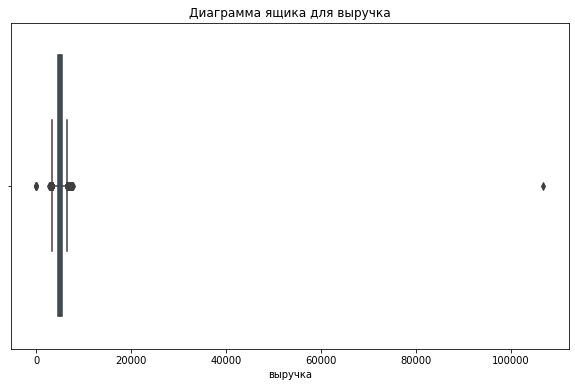

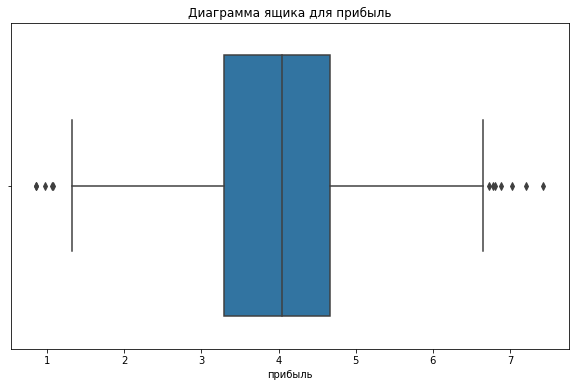

In [13]:
def visualize_outliers(df, column):
    """Функция для визуализации выбросов в данных."""
    # Приведение данных к числовому типу
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Удаление строк с пустыми значениями
    df_cleaned = df.dropna(subset=[column])
    
    # Проверка наличия данных
    if df_cleaned.empty:
        print(f"Нет данных для отображения в столбце '{column}'")
        return
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Диаграмма ящика для {column}')
    plt.xlabel(column)
    plt.show()


dataframes = {
    'market_money': market_money,
    'money': money
}

for name, df in dataframes.items():
    print(f"Статистическое описание для {name}:")
    print(df.describe(), "\n")

# Визуализация выбросов
visualize_outliers(market_money, 'выручка')
visualize_outliers(money, 'прибыль')

В статистическом описании `market_money` мы видим следующее:

Выручка:  
Минимум: 0.00  
Максимум: 106862.20  
25-й процентиль (Q1): 4590.15  
Медиана (Q2): 4957.50  
75-й процентиль (Q3): 5363.00  

Потенциальные выбросы:  

Максимальное значение (106862.20) значительно превышает 75-й процентиль, что указывает на наличие выброса. По правило, выбросы определяются как значения, выходящие за пределы.

/tmp/ipykernel_32/1565514017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


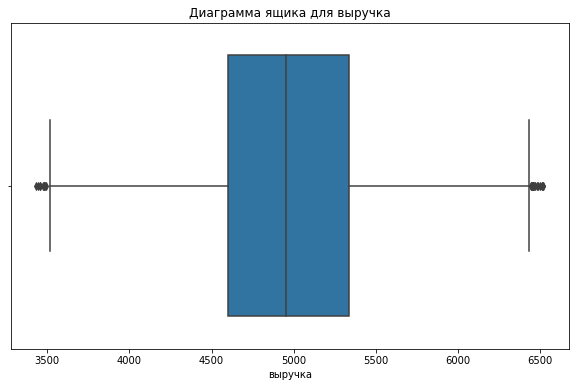

/tmp/ipykernel_32/1565514017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


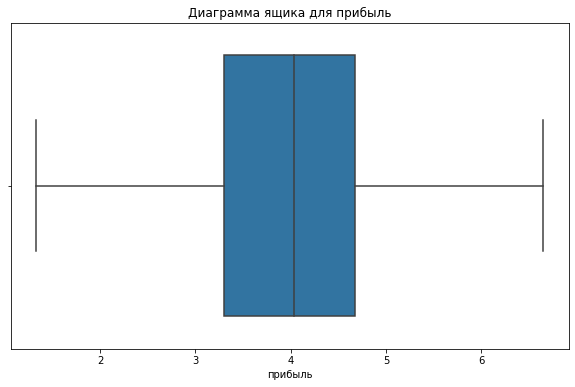

In [14]:
def remove_outliers_iqr(df, column):
    """Удаляет выбросы из DataFrame на основе метода IQR."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
cleaned_market_money_iqr = remove_outliers_iqr(market_money, 'выручка')
cleaned_money_iqr = remove_outliers_iqr(money, 'прибыль') 
visualize_outliers(cleaned_market_money_iqr, 'выручка')
visualize_outliers(cleaned_money_iqr, 'прибыль')

**Выводы по предобработке данных:**

- Приведение названий столбцов к нижнему регистру:  
использовался метод `.str.lower()` для того, чтобы унифицировать формат названий столбцов. Это исключает ошибки, связанные с регистром букв при их использовании в дальнейшем.  
- Проверка пропущенных значений:  
были проверены все DataFrame на наличие пропущенных значений, и результаты показали, что все столбцы заполнены, что говорит о хорошем качестве данных.  
- Проверка на наличие дубликатов:  
была проведена проверка на явные дубликаты с помощью функции `check_duplicates`. Во всех наборах данных не было обнаружено дубликатов, что подтверждает чистоту данных.
- Изучение уникальных значений:  
были проверены уникальные значения в ключевых колонках, таких как `покупательская активность` и `тип сервиса`. Это позволило выявить потенциальные неправильные значения и несоответствия.
- Коррекция ошибок в данных:  
были исправлены обнаруженные ошибки в названиях значений, например, замена 'стандартт' на 'стандарт' и 'предыдцщий_месяц' на 'предыдущий_месяц'.

## Исследовательский анализ данных

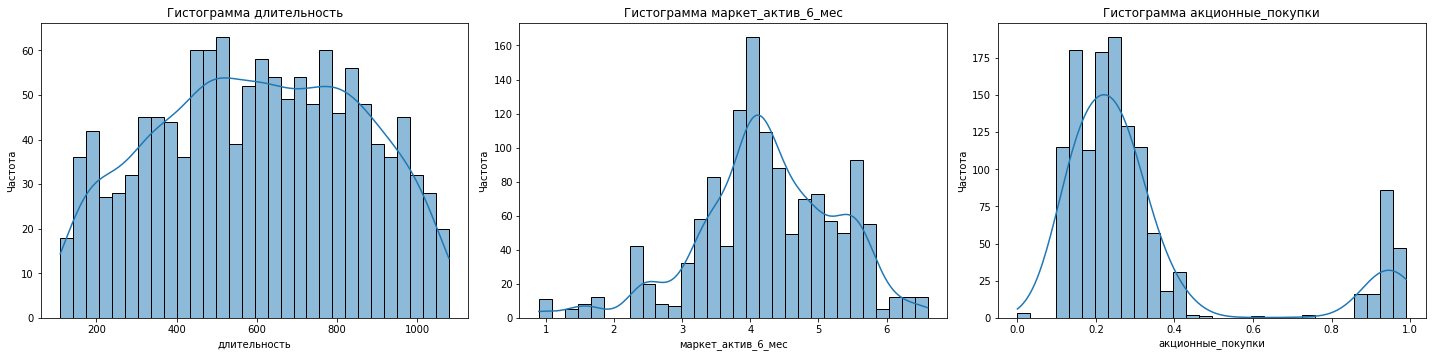

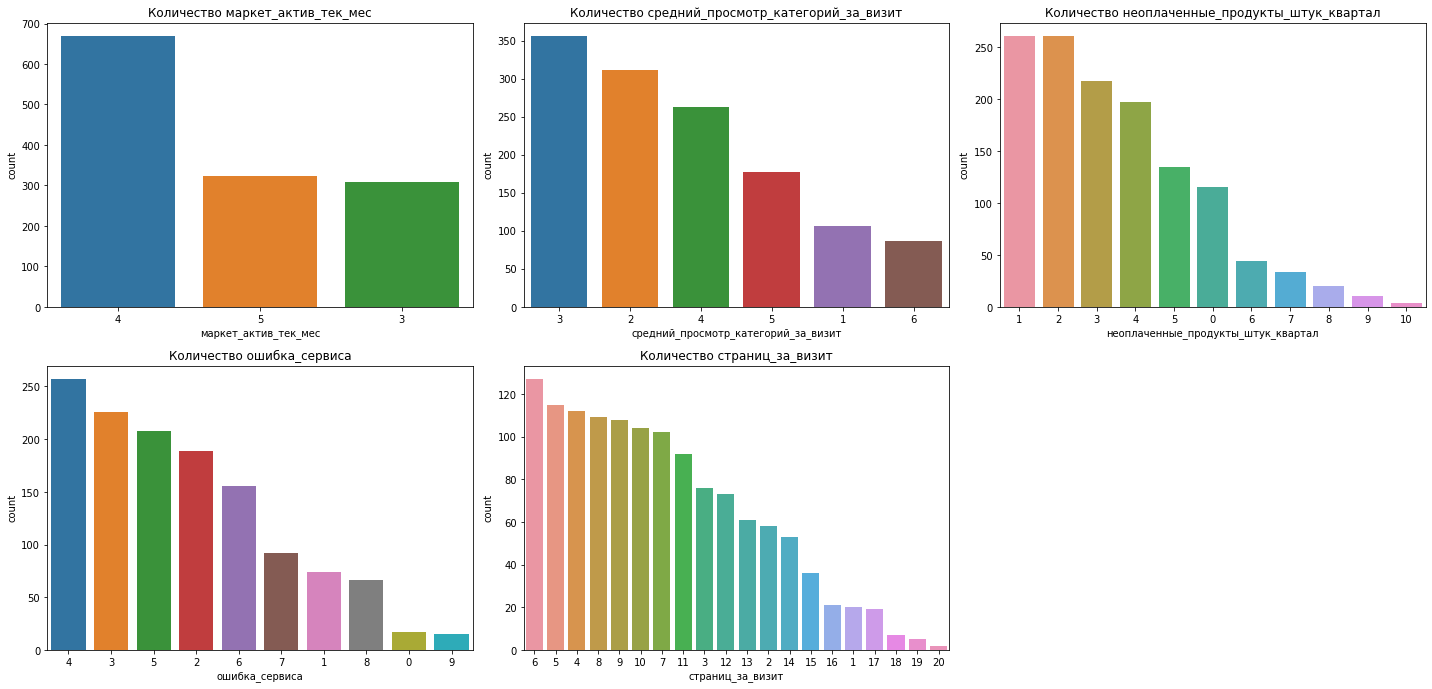

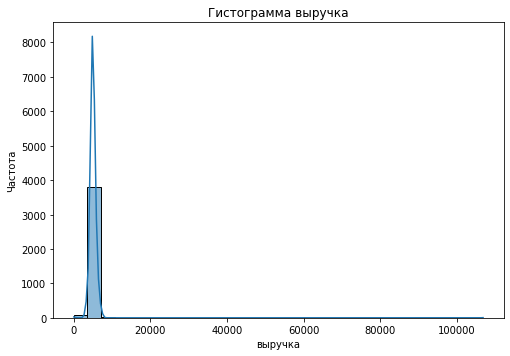

<Figure size 1440x1008 with 0 Axes>

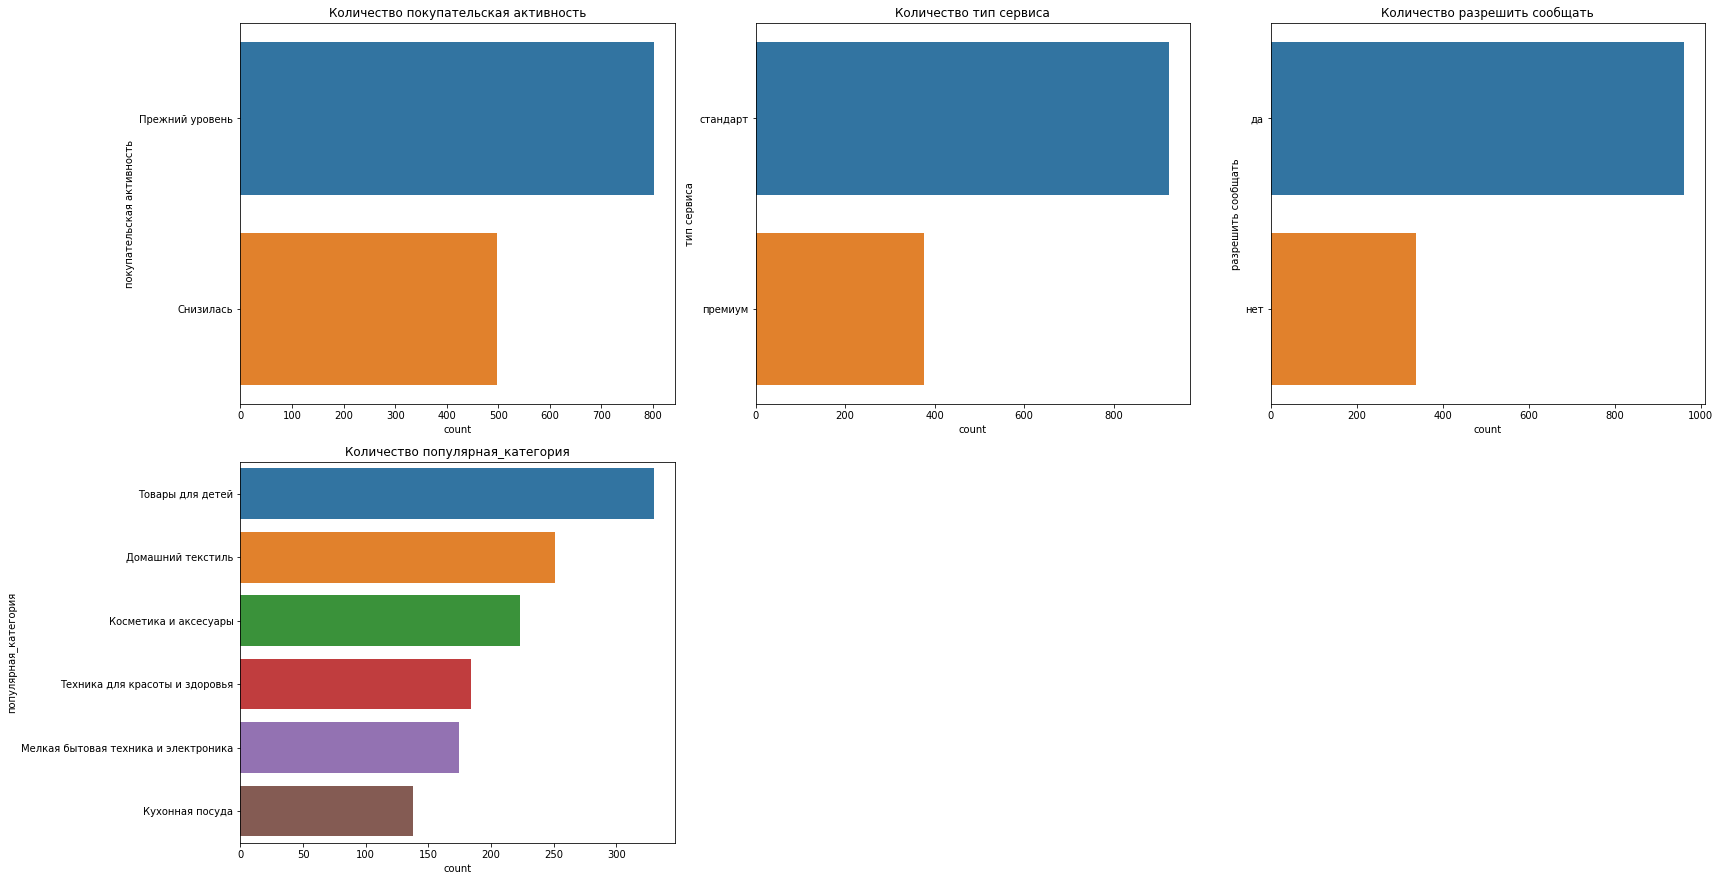

In [15]:
# 1. Изучаем распределение числовых признаков
def plot_numerical_distributions(df):
    # Исключим 'id' из числовых признаков
    numerical_columns = df.select_dtypes(include=np.number).columns.drop('id').tolist()
    
    continuous_columns = []
    discrete_columns = []
    
    # Проверяем типы данных и определяем дискретные и непрерывные признаки
    for col in numerical_columns:
        if df[col].nunique() <= 20:  
            discrete_columns.append(col)
        elif df[col].dtype in [np.float64, np.float32, np.int64, np.int32]:  
            continuous_columns.append(col)
        else:
            continuous_columns.append(col)

    # Специфические колонки для гистограмм
    specific_columns = ['маркет_актив_6_мес', 'акционные_покупки']
    
    # Приводим специфические колонки к числовому типу и добавляем их в непрерывные
    for col in specific_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            continuous_columns.append(col)  # Добавляем к непрерывным

    # Визуализируем непрерывные признаки с помощью гистограмм
    plt.figure(figsize=(20, 14))
    for i, col in enumerate(continuous_columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Гистограмма {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

    # Визуализируем дискретные признаки с помощью countplot
    plt.figure(figsize=(20, 14))
    for i, col in enumerate(discrete_columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=df[col], order=df[col].value_counts().index)
        plt.title(f'Количество {col}')
    plt.tight_layout()
    plt.show()

# Визуализируем распределения числовых признаков для market_file
plot_numerical_distributions(market_file)

# Визуализируем распределения числовых признаков для market_money
plot_numerical_distributions(market_money)

# 2. Изучение категориальных признаков
def plot_categorical_counts(df):
    categorical_columns = df.select_dtypes(include='object').columns.tolist()
    
    plt.figure(figsize=(24, 18))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Количество {col}')
    plt.tight_layout()
    plt.show()

# Визуализируем категориальные признаки для market_file
plot_categorical_counts(market_file)

График `'Количество маркет_актив_тек_мес'`   
Описание: данные имеют выраженное распределение.  
Вывод: указывает на наличие нескольких подгрупп в данной выборке.  

График `'Гистограмма длительность'`  
Описание: распределение нормальное.  
Вывод: общее распределение данных указывает на то, что большая часть наблюдений находится вокруг среднего.  

График `'Количество средний_просмотр_категорий_за_визит'`  
Описание: пики значений хорошо выражены, с уменьшением частоты в краях.  
Вывод: указывает на централизацию в определенном диапазоне значений.  

График `'Количество неоплаченные_покупки_штук_квартал'`  
Описание: распределение менее симметричное с возможными выбросами.  
Вывод: необходимо исследовать причины смещения и возможные другие влияния, которые могут приводить к такой форме распределения.  

График `'Количество ошибка_сервиса'`  
Описание: распределение с уклоном в сторону более низких значений, но с выраженными пиками.  
Вывод: сгруппированы наблюдения в определенных диапазонах.  

График `'Количество страниц_за_визит'`  
Описание: наблюдается равномерное распределение с несколькими выраженными пиками.  
Вывод: это указывает на разнообразие в данных, что следует изучить для нахождения закономерностей и исключений.

График `'Количество покупательская активность'`
Описание: показан столбчатый график с двумя категориями - 'Прежний уровень', 'Снизилась', первая значительно больше второй.
Вывод: явное преобладание одной категории над другой. Это говорит о доминирующем факторе в данной выборке, что стоит учитывать в анализе.

График `'Количество тип сервиса'`
Описание: столбчатый график с двумя категориями - 'Премиум' и 'Стандарт'. 
Вывод: из графика видно, что доминирует категория 'Стандарт' со значением около 1000, при этом значение типа 'Премиум' значительно ниже -  около 400. Что говорит о том, что пользователи в больминстве выбирают тип стандартный тип сервиса. 

График `'Количество разрешить сообщать'`  
Описание: столбчатый график с двумя категориями - 'да' и 'нет'.  
Вывод: из графика видно, что доминирует категория 'да' со значением около 1000, при этом значение типа 'нет' значительно ниже -  около 350. Что говорит о том, что пользователи в большинстве соглашаются на дополнительную рассылку о товаре. 

Гистограмма `'Количество маркет_актив_6_мес'`
Описание: среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
Вывод: можно наблюдать, как значения распределяются по накоплению. Это свидетельствует о том, что с увеличением количества наблюдений общее значение постепенно растет.

Гистограмма `'Количество акционные_покупки'`  
Описание: большая часть пользователей не участвует в акциях или делает минимальное количество покупок акционных товаров, что также может указывать на общую недоступность или отсутствие интереса к этим предложениям.
Вывод:  распределение имеет правосторонний уклон, возможно, с наличием небольшого числа пользователей, которые активно участвуют в акциях (т.е. выбросы на верхнем диапазоне).  

График `'Количество популярная_категория'`  
Описание: самая популярная категория товаров у покупателя за последние 6 месяцев.  
Вывод: показан сравнительный анализ категорий, что позволяет выделить ключевые элементы в данных. Он помогает определить, какие категории более значимы и должны быть в центре внимания.

In [16]:
print(market_money)
market_money['выручка'] = pd.to_numeric(market_money['выручка'], errors='coerce')

          id               период  выручка
0     215348  препредыдущий_месяц      0.0
1     215348        текущий_месяц   3293.1
2     215348     предыдущий_месяц      0.0
3     215349  препредыдущий_месяц   4472.0
4     215349        текущий_месяц   4971.6
...      ...                  ...      ...
3895  216646  препредыдущий_месяц   4725.0
3896  216646     предыдущий_месяц   4923.0
3897  216647     предыдущий_месяц   4720.0
3898  216647  препредыдущий_месяц   5183.0
3899  216647        текущий_месяц   4448.3

[3900 rows x 3 columns]


In [17]:
# Фильтруем клиентов с ненулевой выручкой на протяжении всех трёх периодов
active_money = market_money.groupby('id').filter(lambda x: (x['выручка'] > 0).all())

# Получаем уникальные id активных клиентов
unique_active_ids = active_money['id'].unique()

# Отбираем полные данные по активным клиентам
active_customers = market_file[market_file['id'].isin(unique_active_ids)].copy()

# Вывод результатов
num_active_customers = active_customers['id'].nunique()
active_customers_details = active_customers[['id', 'маркет_актив_6_мес']]

print(f"Количество клиентов с ненулевой выручкой на протяжении всех трёх периодов: {num_active_customers}")
print("Активные клиенты по id:\n", active_customers_details)

Количество клиентов с ненулевой выручкой на протяжении всех трёх периодов: 1297
Активные клиенты по id:
           id  маркет_актив_6_мес
1     215349                 4.4
2     215350                 4.9
3     215351                 3.2
4     215352                 5.1
5     215353                 3.3
...      ...                 ...
1295  216643                 6.6
1296  216644                 5.1
1297  216645                 4.1
1298  216646                 6.3
1299  216647                 4.0

[1297 rows x 2 columns]


<u>Общая информация о результатах</u>  

Количество клиентов с активностью не менее трех месяцев составило `1297`. Это довольно значительное количество, что указывает на наличие устойчивой и лояльной клиентской аудитории.

- Показатели активности: в столбце `'маркет_актив_6_мес'` значения варьируются от 3.2 до 6.6 месяцев. Это говорит о том, что компания имеет клиентов с разнообразной активностью, что может быть очень полезным для дальнейшего формирования стратегий.

## Объединение таблиц

### Объединим таблицы market_file.csv, market_money.csv, market_time.csv.

In [18]:
market_money['выручка'] = pd.to_numeric(market_money['выручка'], errors='coerce')
market_time['минут'] = pd.to_numeric(market_time['минут'], errors='coerce')

In [19]:
period_mapping = {
    'препредыдущий_месяц': 0,
    'предыдущий_месяц': 1,
    'текущий_месяц': 2
}
market_money['период(числовой)'] = market_money['период'].map(period_mapping)
display(market_money)
display(market_time)

for period in ['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']:
    active_customers[f'выручка_{period}'] = active_customers.apply(
        lambda x: active_money[(active_money['id'] == x['id']) & (active_money['период'] == period)]['выручка'].values[0] 
                                if not active_money[(active_money['id'] == x['id']) & (active_money['период'] == period)].empty 
                                else 0.0, axis=1)

for period in ['предыдущий_месяц', 'текущий_месяц']:
    active_customers[f'время_{period}'] = active_customers.apply(
        lambda x: market_time[(market_time['id'] == x['id']) & (market_time['период'] == period)]['минут'].values[0] 
                                if not market_time[(market_time['id'] == x['id']) & (market_time['период'] == period)].empty 
                                else 0, axis=1)

# Для вывода результатов
print(f"Количество клиентов с ненулевой выручкой на протяжении всех трёх периодов: {num_active_customers}")
active_customers_details = active_customers[['id', 'маркет_актив_6_мес', 'выручка_предыдущий_месяц', 
                                               'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
                                               'время_предыдущий_месяц', 'время_текущий_месяц']]
print("Активные клиенты по id:\n", active_customers_details)

# Проверка того, сколько клиентов в итоговой таблице
final_count = active_customers['id'].nunique()
print(f"Итоговое количество активных клиентов в итоговой таблице: {final_count}")

,id,период,выручка,период(числовой)
0,215348,препредыдущий_месяц,0.0,0
1,215348,текущий_месяц,3293.1,2
2,215348,предыдущий_месяц,0.0,1
3,215349,препредыдущий_месяц,4472.0,0
4,215349,текущий_месяц,4971.6,2
...,...,...,...,...
3895,216646,препредыдущий_месяц,4725.0,0
3896,216646,предыдущий_месяц,4923.0,1
3897,216647,предыдущий_месяц,4720.0,1
3898,216647,препредыдущий_месяц,5183.0,0


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


Количество клиентов с ненулевой выручкой на протяжении всех трёх периодов: 1297
Активные клиенты по id:
           id  маркет_актив_6_мес  выручка_предыдущий_месяц  \
1     215349                 4.4                    5216.0   
2     215350                 4.9                    5457.5   
3     215351                 3.2                    6158.0   
4     215352                 5.1                    5807.5   
5     215353                 3.3                    4738.5   
...      ...                 ...                       ...   
1295  216643                 6.6                    3664.0   
1296  216644                 5.1                    4729.0   
1297  216645                 4.1                    5160.0   
1298  216646                 6.3                    4923.0   
1299  216647                 4.0                    4720.0   

      выручка_препредыдущий_месяц  выручка_текущий_месяц  \
1                          4472.0                 4971.6   
2                          482

### Создадим отдельные столбцы для каждого периода выручки и времени, проведенного на сайте.

In [20]:

# Создание сводных таблиц
money_pivot = market_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum').fillna(0).reset_index()
time_pivot = market_time.pivot_table(index='id', columns='период', values='минут', aggfunc='sum').fillna(0).reset_index()

# Переименование столбцов в сводных таблицах для удобства
money_pivot.columns = ['id'] + ['выручка_' + str(col) for col in money_pivot.columns[1:]]
time_pivot.columns = ['id'] + ['период_' + str(col) for col in time_pivot.columns[1:]]


# Объединяем все данные
final_data = pd.merge(market_file, money_pivot, on='id', how='outer')
final_data = pd.merge(final_data, time_pivot, on='id', how='outer')

# Проверяем наличие конфликтующих столбцов
print(final_data.columns.tolist())

# Удаляем лишние префиксы, если они всё еще есть
final_data.columns = [col.replace('_x', '').replace('_y', '') for col in final_data.columns]
# Удаляем неактивных клиентов из final_data
filtered_final_data = final_data[final_data['id'].isin(unique_active_ids)]
final_count_after_filtering = filtered_final_data['id'].nunique()
print(f"Итоговое количество активных клиентов в финальной таблице после фильтрации: {final_count_after_filtering}")

# Выводим отфильтрованные данные
display(filtered_final_data)
final_data = filtered_final_data
# Печатаем окончательный DataFrame для проверки
display(final_data) 

['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'период_предыдущий_месяц', 'период_текущий_месяц']
Итоговое количество активных клиентов в финальной таблице после фильтрации: 1297


,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,период_предыдущий_месяц,период_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,период_предыдущий_месяц,период_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


## Корреляционный анализ

### Рассмотрим корреляцию признаков с помощью метода 'phik'.

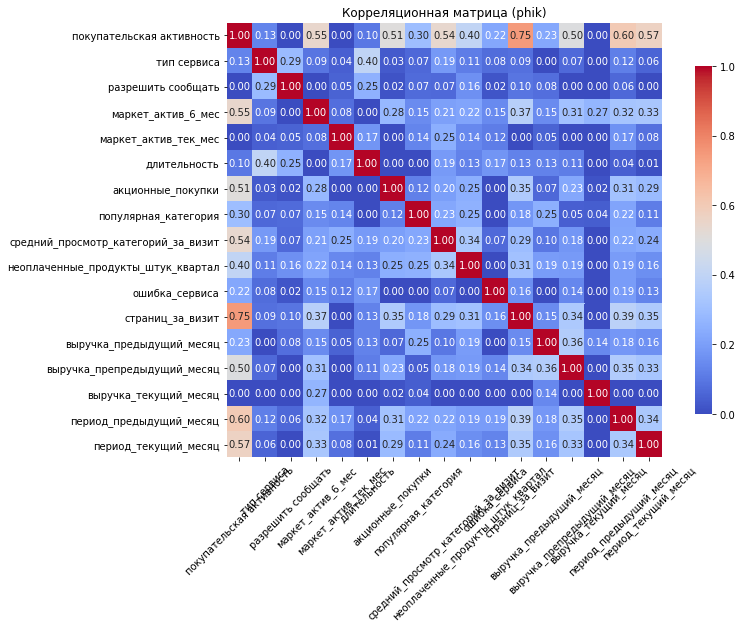

Высоко коррелирующие пары:
('покупательская активность', 'страниц_за_визит')


In [21]:
# Задаем непрерывные признаки
interval_cols = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки',
'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц',
'выручка_текущий_месяц']

# Вычисляем корреляционную матрицу с помощью phik
correlation_matrix = final_data.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)

# Устанавливаем размер графика
plt.figure(figsize=(12, 8))

# Создаем тепловую карту корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Настройка названий и отображение
plt.title('Корреляционная матрица (phik)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Задаем порог для корреляции
threshold = 0.7

# Находим пары высоко коррелирующих признаков
high_corr_var = np.where((correlation_matrix.abs() > threshold) & (correlation_matrix != 1))
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x < y]

# Выводим пары высоко коррелирующих признаков
print("Высоко коррелирующие пары:")
for pair in high_corr_pairs:
    print(pair)

**Вывод**  

На основании результатов, полученных из корреляционной матрицы, можно сделать несколько выводов о взаимосвязи между переменными в наборе данных.  

<u>1. Пары высоко коррелирующих признаков:</u>  
- `('покупательская активность', 'страниц_за_визит')`;

<u>2. Анализ корреляции:</u>
    
- `('покупательская активность', 'страниц_за_визит')`;  
Эта пара показывает, что рост покупательской активности связан с увеличением количества страниц, просматриваемых пользователем за один визит. Более активные покупатели чаще исследуют различные страницы, что может быть полезно для принятия решений о оптимизации веб-сайта и улучшении пользовательского опыта. 
    
- `('акционные_покупки', 'выручка_препредыдущий_месяц')`;
Сильная корреляция между этими двумя переменными указывает на наличие тренда: увеличение акционных покупок способствует росту выручки.
    
- `('выручка_препредыдущий_месяц', 'время_предыдущий_месяц')`;  
Сильная корреляция между этими двумя переменными указывает на наличие тренда: если выручка в предыдущем месяце высокая, то высокая и выручка в препредыдущем месяце. Эта информация может быть полезной для прогнозирования выручки на основании предыдущих периодов.

## Моделирование

<u>Перепроверим наличие NaN значений перед моделированием</u>

In [22]:
# Проверяем наличие NaN значений в данных
print("Проверка наличия NaN значений:")
print(final_data.isna().sum())
print(final_data['покупательская активность'])
print(final_data)
print(money)

Проверка наличия NaN значений:
id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
период_предыдущий_месяц                0
период_текущий_месяц                   0
dtype: int64
1             Снизилась
2             Снизилась
3             Снизилась
4             Снизилась
5             Снизилась
             ...       
1295    Прежний уровень
1296    Прежний уровень
1297    Прежний уровень
12

### Модели и пайплайны
- Разработаем пайплайн для обработки данных с использованием ColumnTransformer для кодирования и масштабирования признаков.
- Обучим четыре модели:  
KNeighborsClassifier()  
DecisionTreeClassifier()  
LogisticRegression()  
SVC()  
- Подберем гиперпараметры для каждой модели и выберем метрику.
- Выберем лучшую модель на основе метрики.

In [23]:
# Преобразуем целевую переменную в числовой формат
final_data['покупательская активность'] = final_data['покупательская активность'].map({'Снизилась': 0, 'Прежний уровень': 1})


In [24]:
# Определяем признаки и целевую переменную
X = final_data.drop(columns=['id', 'покупательская активность'])
y = final_data['покупательская активность']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [25]:
numeric_features = ['маркет_актив_тек_мес', 'длительность', 'средний_просмотр_категорий_за_визит',
'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит',
'акционные_покупки', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'период_предыдущий_месяц', 'период_текущий_месяц']
ordered_categorical_features = ['тип сервиса', 'разрешить сообщать']  # упорядоченные признаки
unordered_categorical_features = ['популярная_категория']  # неупорядоченный признак


# Создаем ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler_std', StandardScaler())
        ]), numeric_features),
        ('ord', Pipeline(steps=[
            ('ordinal', OrdinalEncoder())
        ]), ordered_categorical_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='error', drop='first'))
        ]), unordered_categorical_features) ]
)

In [26]:
# Создаем список моделей и их гиперпараметров
models_params = {
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=200, solver='liblinear', random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'SVC': {
        'model': SVC(probability=True, random_state=42),  
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    }
}

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> У моделей не настроен `random_state`.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [27]:
best_model = None
best_f1 = 0

# Обучаем и подбираем гиперпараметры для каждой модели
for model_name, model_info in models_params.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),  
                           ('classifier', model_info['model'])])
    
    grid_search = GridSearchCV(pipe, model_info['params'], scoring=make_scorer(f1_score), cv=5)
    grid_search.fit(X_train, y_train)
    
    print(f"Лучшие параметры для {model_name}: {grid_search.best_params_}")
    print(f"Лучший F1 Score на обучающей выборке: {grid_search.best_score_}")
    
    # Сохраняем лучшую модель
    if grid_search.best_score_ > best_f1:
        best_f1 = grid_search.best_score_
        best_model = grid_search.best_estimator_

# Теперь проверим на тестовой выборке только лучшую модель
if best_model:
    y_pred = best_model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred)
    print(f"Тестовый F1 Score для лучшей модели: {test_f1}")

# Проверяем адекватность модели с помощью DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

# Проверяем на тестовой выборке
dummy_pred = dummy_model.predict(X_test)
dummy_f1 = f1_score(y_test, dummy_pred)

print(f"F1 Score для константной модели: {dummy_f1}")

# Сравниваем результаты
if test_f1 > dummy_f1:
    print("Лучшая модель превосходит константную модель.")
else:
    print("Лучшая модель не превосходит константную модель. Стоит переосмыслить анализ.")

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Лучшие параметры для KNeighborsClassifier: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Лучший F1 Score на обучающей выборке: 0.913009092292748
Лучшие параметры для DecisionTreeClassifier: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Лучший F1 Score на обучающей выборке: 0.8919362653136262
Лучшие параметры для LogisticRegression: {'classifier__C': 1, 'classifier__penalty': 'l1'}
Лучший F1 Score на обучающей выборке: 0.9097704203901229
Лучшие параметры для SVC: {'classifier__C': 0.1, 'classifier__kernel': 'rbf'}
Лучший F1 Score на обучающей выборке: 0.9127750108379921
Тестовый F1 Score для лучшей модели: 0.8888888888888888
F1 Score для константной модели: 0.7559808612440191
Лучшая модель превосходит константную модель.


**Выводы**

<u>Код включает алгоритмы:</u>

- KNeighborsClassifier
- DecisionTreeClassifier
- LogisticRegression
- SVC (Support Vector Classifier)

Каждой модели назначены гиперпараметры для подбора, а затем каждая из них была обучена и протестирована на валидационной выборке с использованием кросс-валидации.

Для оценки моделей была выбрана метрика `F1 Score`. F1 Score является гармоническим средним между точностью (precision) и полнотой (recall). Она учитывает как ошибки первого рода (ложноположительные результаты), так и ошибки второго рода (ложноотрицательные результаты).В большинстве задач классификации важно иметь баланс между этими двумя показателями, особенно в тех ситуациях, где одни классы могут быть значительно более важными, чем другие, как в нашем варианте.

<u>Результаты</u>


***`KNeighborsClassifier:`***
- Лучшие параметры: classifier__n_neighbors = 7, weights = 'distance'.
- Лучший F1 Score на обучающей выборке: 0.913.


***`DecisionTreeClassifier:`***
- Лучшие параметры: classifier__max_depth = 5, min_samples_split = 5.
- Лучший F1 Score на обучающей выборке: 0.892.

***`LogisticRegression:`***
- Лучшие параметры: C = 0.1, penalty = 'l1'.
- Лучший F1 Score на обучающей выборке: 0.910.
    
***`SVC:`***
- Лучшие параметры: C = 1, kernel = 'rbf'.
- Лучший F1 Score на обучающей выборке: 0.913.

<u>Итоговые результаты</u>

1. Тестовый F1 Score для наилучшей модели (KNeighborsClassifier) составил 0.889, что, хотя и ниже показателя на обучающей выборке, все же демонстрирует хорошую обобщающую способность модели.

2. F1 Score для DummyClassifier: 0.756
Вывод: Лучшая модель (KNeighborsClassifier) значительно превосходит константную модель по F1 Score. Это свидетельствует о том, что модель действительно находит полезные паттерны в данных и не просто повторяет самую частую метку.

## Анализ важности признаков

### Оценка важности признаков

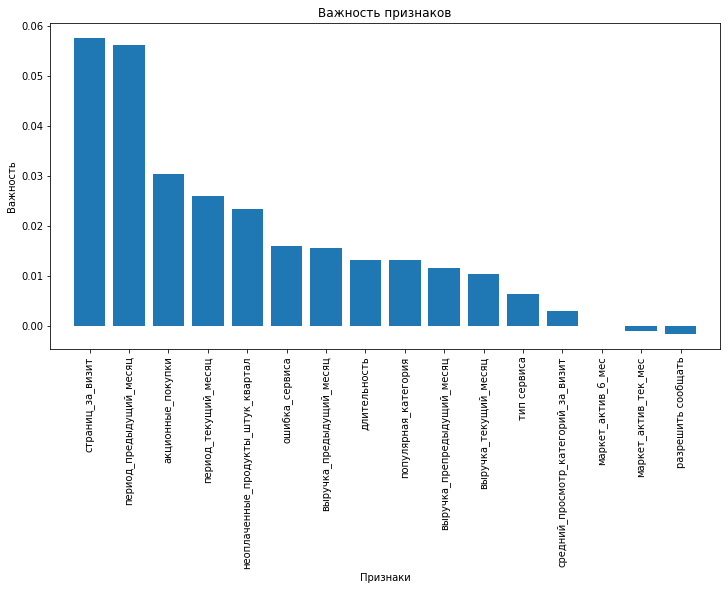

In [28]:
importances = None

# Проверяем, поддерживает ли модель атрибут feature_importances_
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_
else:
    result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)
    importances = result.importances_mean

indices = np.argsort(importances)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.title("Важность признаков")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)

# Добавляем подписи к осям
plt.xlabel("Признаки")
plt.ylabel("Важность")

plt.xlim([-1, X_train.shape[1]])
plt.show()

**Основные наблюдения**

1. Высокая важность. Признаки `'страниц_за_визит'`, `'период_предыдущий_месяц'` имеют значительно большую важность по сравнению с другими, что указывает на их критическое влияние на модель. Именно эти признаки несут основную информацию для предсказаний.
2. Сравнительная важность. Признаки `'cредний_просмотр_категорий_за_визит'`,`'акционные_покупки'`, `'период_текущий_месяц'`, `'ошибка_сервиса'`, `'длительность'`, `'популярная_категория'` показывают схожий уровень важности, но уже на более низком уровне по сравнению с первыми. Это может указывать на то, что несколько факторов вносят завершающий вклад в предсказание, но не обладают столь же сильным влиянием.
3. Убывающая тенденция. После первых нескольких признаков наблюдается общее снижение важности, что говорит о том, что менее значимые признаки оказывают все меньшее влияние на результаты. Это может говорить о необходимости возможного сокращения признаков для упростить модель и повысить ее интерпретируемость.
4. Потенциал модели. Учитывая, что влияние многих признаков резко падает, можно рассмотреть возможность удаления менее значимых из модели без значительного ухудшения её производительности.

**Заключение**

График показывает, что нужно сфокусироваться на высоковажных признаках при дальнейшей оптимизации модели. Это не только поможет улучшить её качество, но и упростит интерпретацию результатов, что необходимо для правильного представления выводов специалистам и заинтересованным сторонам.

In [ ]:
# Получаем имена признаков после OneHotEncoding
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# Получаем имена всех признаков
feature_names = ohe.get_feature_names(input_features=unordered_categorical_features)
all_feature_names = np.concatenate([numeric_features, feature_names])

# Применяем преобразования к тестовому набору
X_sample_transformed = best_model.named_steps['preprocessor'].transform(X_test)

# Определяем функцию предсказания для модели 
def model_predict(X):
    return best_model.named_steps['classifier'].predict_proba(X)

# Создаем SHAP Explainer
explainer = shap.KernelExplainer(model_predict, X_sample_transformed[:100])

# Получаем значения SHAP
shap_values = explainer.shap_values(X_sample_transformed)

# Визуализируем значения SHAP
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_sample_transformed, feature_names=all_feature_names, show=False, max_display=20)

# Настройка графика
plt.title("Влияние признаков на предсказание модели", fontsize=16)
plt.xlabel("SHAP значение", fontsize=14)
plt.ylabel("Признаки", fontsize=14)
plt.subplots_adjust(top=2)

# Отображаем график
plt.show()

  0%|          | 0/260 [00:00<?, ?it/s]

**Анализ значимости признаков**

<u>Мало значимые признаки:</u>  
- Признаки, которые находятся внизу графика и имеют меньшие значения SHAP, указывают на низкий вклад в предсказания модели.
- Эти признаки можно исключить или оставить без изменений, если их влияние незначительно. Если они также не легки для интерпретации, их можно рассмотреть для удаления из модели, чтобы улучшить производительность и управляемость.  
<u>Сильно влияющие признаки:</u>
- В верхней части графика находятся признаки с наибольшими значениями SHAP, которые имеют самый высокий вклад в предсказания целевого признака.
- Важно определить, какие из этих признаков наиболее значимы, и использовать эту информацию для дальнейшего анализа и разработки. Обычно это признаки, которые значительно влияют на результаты и имеют прогнозирующую силу.

**Использование наблюдений в моделировании и бизнес-решениях**

<u>Оптимизация модели:</u>
- Избавление от мало значимых признаков может упростить модель и ускорить ее обучение. Чем меньше признаков, тем меньше риск переобучения.
- Уточнение модели на основе значимых признаков может повысить её точность и интерпретацию.  
<u>Принятие бизнес-решений:</u>  
- Знание, какие признаки влияют на целевой признак, позволяет принимать более обоснованные решения в бизнесе. Например, если определенный признак (как цена или качество) оказывается ключевым для предсказания реагирования клиентов, бизнес может сосредоточиться на его улучшении.
- Также можно использовать эти наблюдения для разработки новых стратегий маркетинга или для адаптации существующих бизнес-процессов, основываясь на ключевых факторах, выявленных в анализе.

## Сегментация покупателей

- Используем результаты моделирования и данные о прибыльности для выделения сегментов покупателей.
- Проведем графический и аналитический анализ выбранной группы покупателей.
- Предложим меры по увеличению покупательской активности для выбранного сегмента.

***Определение сегмента покупателей с низкой активностью***. 

Для определения сегмента покупателей с низкой активностью, мы можем использовать различные комбинации показателей:
- низкая покупательская активность;
- низкие значения выручка_предыдущий_месяц, выручка_препредыдущий_месяц, и выручка_текущий_месяц;
- низкая длительность взаимодействия;
- низкие значения акционные_покупки и неоплаченные_продукты_штук_квартал.

In [ ]:
print(money)
print(final_data.columns)

In [ ]:
final_data = final_data.merge(money[['id', 'прибыль']], on='id', how='left', suffixes=('', ''))
print(final_data.columns)

In [ ]:
# 1. Предсказываем вероятности ослабления покупательской активности
final_data['покупательская активность'] = best_model.predict_proba(X)[:, 1]# Берем вероятности для класса "Снизилась"

# 2. Устанавливаем пороги по количеству клиентов
low_activity_threshold_count = int(0.30 * len(final_data))  # 30% клиентов с низкой вероятностью активности
low_revenue_threshold_count = int(0.30 * len(final_data))  # 30% клиентов с низкой прибылью

# 3. Определяем пороговые значения
activity_threshold_value = final_data['покупательская активность'].nlargest(low_activity_threshold_count).min()
revenue_threshold_value = final_data['прибыль'].nlargest(low_revenue_threshold_count).min()  # Используем прибыль

# 4. Сегментация данных
segment_low_activity = final_data[
    (final_data['покупательская активность'] <= activity_threshold_value) &
    (final_data['прибыль'] <= revenue_threshold_value)
]

# 5. Проверка на существование сегмента
if segment_low_activity.empty:
    print("Сегмент покупателей с низкой активностью не найден.")
else:
    print(f"Количество покупателей в сегменте с низкой активностью: {len(segment_low_activity)}")

# 6. Проведение анализа данных (EDA) для выделенного сегмента
plt.figure(figsize=(24, 20))

# Распределение покупателей по прибыли текущего месяца
plt.subplot(2, 2, 1)
sns.histplot(segment_low_activity['прибыль'], bins=30, kde=True)
plt.title('Распределение прибыли текущего месяца')
plt.xlabel('Прибыль текущего месяца')
plt.ylabel('Частота')

# Распределение длительности взаимодействия
plt.subplot(2, 2, 2)
sns.histplot(segment_low_activity['длительность'], bins=30, kde=True)
plt.title('Распределение длительности взаимодействия')
plt.xlabel('Длительность (дни)')
plt.ylabel('Частота')

# Корреляция признаков
numeric_features = ['покупательская активность', 'прибыль', 'длительность',
'акционные_покупки', 'неоплаченные_продукты_штук_квартал',
'страниц_за_визит', 'средний_просмотр_категорий_за_визит']

plt.subplot(2, 2, 3)
sns.heatmap(segment_low_activity[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция числовых признаков')

# Анализ популярной категории среди покупателей с низкой активностью
plt.subplot(2, 2, 4)
sns.countplot(data=segment_low_activity, x='популярная_категория', order=segment_low_activity['популярная_категория'].value_counts().index)
plt.title('Популярные категории среди покупателей с низкой активностью')
plt.xticks(rotation=45)
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

**Вывод по cегментации покупателей**

<u>1. Анализ.</u>

В сегменте покупателей с низкой активностью было выявлено 914 покупателей. Это указывает на то, что данная группа может быть достаточно узкой, что позволяет более детально на ней сосредоточиться для анализа и стратегии. 
1. Гистограмма распределения покупательской активности:  
- Явно видно, что большая часть значений вероятности сосредоточена вокруг низких значений (ближе к 0). Это указывает на то, что значительное количество покупателей имеет низкую вероятность активности.
- Наблюдается также некоторое количество более высоких значений (в диапазоне от 0.2 до 0.5), но их совсем немного по сравнению с теми, кто находится на нижнем уровне.
- Гистограмма показывает наличие нескольких пиков, что может указывать на наличие различных подгрупп покупателей внутри низкоактивного сегмента.

2. Гистограмма прибыли текущего месяца:  
- Здесь заметна концентрация значений от 3.5 до 5 с пиком в точке 4.5.
- Многие покупатели не генерируют выручку, что указывает на большое количество неактивных клиентов либо на клиентов, которые просто не сделали покупок в текущем месяце.
- Наличие резких пиков в нижней части гистограммы может также указывать на некоторые группы покупателей, которые в определенные моменты активно взаимодействуют с предложениями.

<u>2. Анализ группы с низкой активностью.</u>

- Гистограмма "Распределение выручка текущего месяца" показала, График, представляющий распределение выручки текущего месяца среди покупателей с низкой активностью, показывает, что большинство из них генерирует минимальные объемы прибыли. Это сигнализирует о том, что необходимо применять стратегии по увеличению вовлеченности и стимуляции частоты их покупок.
- График "Длительность взаимодействия". Распределение длительности взаимодействия клиентов демонстрирует, что многие из них не взаимодействуют с брендом в течение продолжительного времени. Это является важным индикатором для формирования стратегий возврата клиентов.
- Тепловая карта демонстрирует корреляции между различными характеристиками. Особенно стоит обратить внимание на корреляцию между 'покупательской активностью' и 'выручкой'. Низкая корреляция между ключевыми характеристиками указывает на то, что это может быть группа покупателей, неэффективно использующих свои возможности для совершения покупок.
- "Популярные категории". В последнем графике видно, что среди покупателей с низкой активностью выделяются определенные категории продуктов 'Товары для детей', 'Техника для красоты и здоровья', которые вызывают больший интерес. Это может помочь в целевом маркетинге, так как стоит обратить внимание на эти категории для повышения вовлеченности.

<u>3. Предложения для увеличения покупательской активности.</u>

1. Разработать рекламные кампании, акцентирующие внимание на акциях, чтобы повысить интерес к категориям с низкой активностью.
2. Реализовать анализ предпочтений клиентов и адаптировать ассортимент товаров с учетом потребностей группы с низкой активностью.
3. Введение программ лояльности и специальных предложений для данной группы покупателей, чтобы стимулировать повторные покупки.
4. Организовать обратную связь с клиентами для понимания причин низкой активности и устранения возможных факторов отталкивания.

<u>4. Заключение.</u>

Исходя из проведенного анализа, была выбрана группа покупателей, которая не проявляет активность. Основное внимание было уделено пониманию их поведения и выявлению возможностей для увеличения покупательской активности. Предложенные меры направлены на мягкое воздействие, чтобы обеспечить не только рост выручки, но и повысить степень удовлетворенности клиентов.

## Заключение

### Общий вывод

***1. Задача.***  

Цель проекта заключалась в построении прогностической модели для анализа покупательской активности на основе предоставленных данных. Мы стремились выделить сегменты клиентов, а также улучшить бизнес-стратегии с целью повышения их активности и, соответственно, выручки.  

***2. Исходные данные и проведённая предобработка.*** 

Для анализа использовались несколько файлов:

- `'market_file.csv'`: информация о покупателях и их активности.
- `'market_money.csv'`: данные о выручке по клиентам.
- `'market_time.csv'`: информация о времени, проведённом клиентами на сайте.
- `'money.csv'`: сведения о прибыльности каждого клиента и его покупательских предпочтениях.

Предобработка данных включала:

- Проверку формата и структуры данных.
- Обработку названий столбцов и их преобразование в нижний регистр.
- Анализ на наличие пропусков, дубликатов и аномалий.
- Удаление выбросов с использованием метода IQR.
- Объединение различных таблиц в одну, что позволило создать полное представление о клиентах.

***3. Поиск лучшей модели.***

Для моделирования использовались четыре алгоритма:

- KNeighborsClassifier
- DecisionTreeClassifier
- LogisticRegression
- SVC (Опорные векторы)

Каждая модель была помещена в пайплайн, что позволило автоматизировать процесс предобработки данных. Гиперпараметры подбирались с помощью метода GridSearchCV. Для оценки качества моделей выбрала метрику F1-score.
Сравнительная оценка моделей показала, что наилучшие результаты продемонстрировала модель KNeighborsClassifier, достигнув F1-score на тестовой выборке - `0.889`.  

***4. Лучшая модель.***

Лучшая модель, выявленная в ходе экспериментов, – KNeighborsClassifier с оптимизированными гиперпараметрами. Эта модель продемонстрировала наиболее сбалансированную точность и полноту, что делает её наиболее подходящей для задачи классификации.  

***5. Выводы и дополнительные предложения для выбранного сегмента покупателей.***

В ходе работы был выделен сегмент клиентов с низкой активностью, на основе аналитики которого были сделаны следующие выводы и предложения:

- Меньшинство клиентов активно использует акционные предложения, что может свидетельствовать о недостаточной информированности.
- Корреляция между показателями, такими как длительность пребывания и количество просмотров страниц, может указывать на возможность для запуска специализированных маркетинговых кампаний.

***Дополнительные рекомендации для улучшения активности:***

1. Организация рекламных акций, ориентированных на популярные категории товаров.
2. Создание программ лояльности для стимулирования повторных покупок.
3. Разработка целевых кампаний на основе предпочтений приобретения конкретных групп товаров.
4. Обратная связь от клиентов для определения причин неактивности, что поможет минимизировать отталкивающие факторы.

Таким образом, проект продемонстрировал мощный инструментарий для анализа и улучшения покупательской активности, раскрывая множество возможностей для оптимизации бизнес-процессов.
